# Finding roundworm edges

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
from skimage import feature

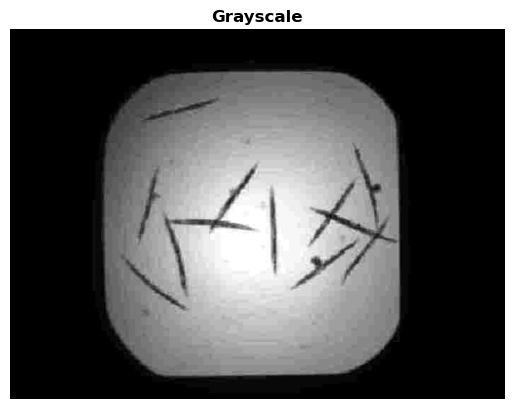

In [2]:
worms = cv2.imread("./images/worms.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(worms, cmap='gray')
plt.axis('off')
plt.title("Grayscale")
plt.show()

Use the edge function to locate roundworms.

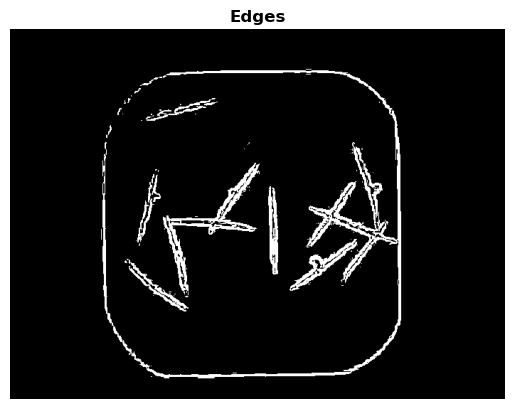

In [3]:
worms_edge = filters.sobel(worms)
worms_edge = worms_edge / worms_edge.max() * 255
thresh, worms_edge = cv2.threshold(worms_edge.astype(np.uint8), 127, 255, cv2.THRESH_OTSU)

plt.imshow(worms_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

Looks like there's some background noise captured both inside and around the worms. Let´s set a higher threshold to avoid capturing weaker edges.

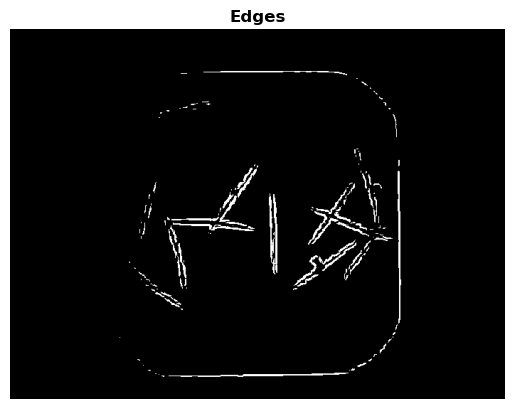

In [4]:
worms_edge = filters.sobel(worms)
worms_edge = worms_edge / worms_edge.max() * 255
_, worms_edge = cv2.threshold(worms_edge.astype(np.uint8), thresh * 2, 255, cv2.THRESH_BINARY)

plt.imshow(worms_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

That eliminated the noise, but it looks like some worm edges were fractured in the process. In cases where setting the threshold alone isn't enough, it's worth trying a different edge finding algorithm [canny()](https://scikit-image.org/docs/stable/api/skimage.feature.html#canny).

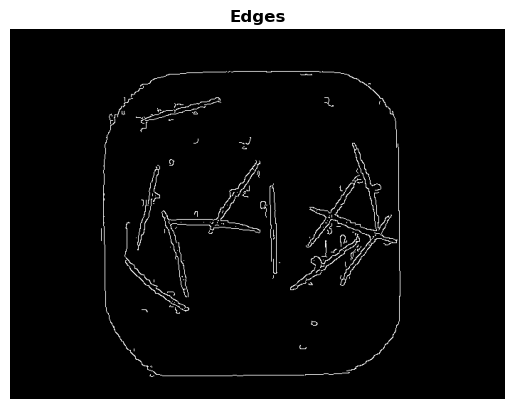

In [5]:
worms_edge = feature.canny(worms)

plt.imshow(worms_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

With the default thresholds, the Canny method is a bit overzealous for these worms. We can specify a two-element threshold when using the Canny method to fine-tune which edges are found. We can increase the high threshold to reduce the number of strong edges found in the initial pass.

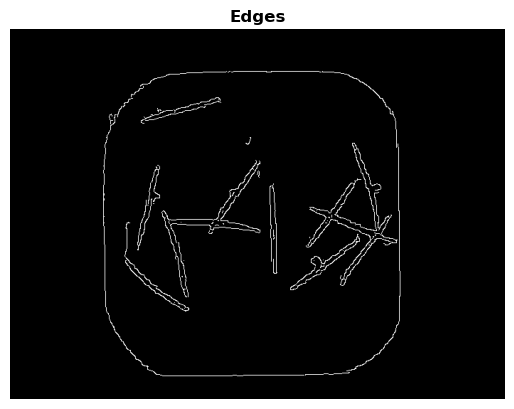

In [6]:
worms_edge = feature.canny(worms, high_threshold=255 * 0.3)

plt.imshow(worms_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()

That worked but we might notice there's some "stringing" at the ends of a few worms. This occurred because the low threshold is too low, causing extraneous faint edges to be identified because of their connection to the stronger worm edges. We can increase the low threshold to avoid picking up these undesirable edges.

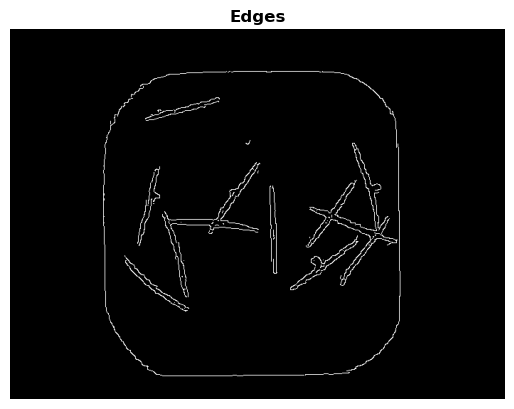

In [7]:
worms_edge = feature.canny(worms, low_threshold=255 * 0.2, high_threshold=255 * 0.3)

plt.imshow(worms_edge, cmap='gray')
plt.title("Edges")
plt.axis('off')
plt.show()